<a href="https://colab.research.google.com/github/naterattner/data71200/blob/master/project_2/data71200_summer24_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python notebook for project 2: LINK TK

The goal for this assignment is to apply different types of supervised learning algorithms with a range of parameter settings to your data and to observe which performs better. In this notebook we apply two supervised learning techniques to the dataset created in [project 1](https://github.com/naterattner/data71200/blob/master/project_1/data71200_summer24_project1.ipynb).

I'll be using this dataset containing estimations of obesity levels based on eating habits and physical condition: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [284]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

!pip install -U scikit-learn==1.4
!pip install mglearn
import mglearn

### Step 1: Load data

In [285]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
features = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
targets = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

### Step 2: Prepare  data
Because the dataset contains categorical variables, we will **first** perform one-hot encoding. This is done on a Dataframe containing all data to ensure categorical values are represented in the same way in both the testing and training sets.

Once one-hot encoding is done, we split the data into testing and training sets.

#### Put data into a Dataframe containing both features and targets

#### Perform one-hot encoding on the categorical features



In [286]:
# First look at all of the columns to check their values. We will compare against this later to make sure that only true categorical values got encoded
# for i in data.columns:
for i in features.columns:
  print(i)
  print(features[i].value_counts())
  print('')

Gender
Gender
Male      1068
Female    1043
Name: count, dtype: int64

Age
Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64

Height
Height
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: count, Length: 1574, dtype: int64

Weight
Weight
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: count, Length: 1525, dtype: int64

family_history_with_overweight
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

FAVC
FAVC
yes    1866
no      245
Name: count, dtype: int64

FCVC
FCVC
3.000000    652
2.000000    600
1.000000     33

In [287]:
#One-hot encoding
data_dummies = pd.get_dummies(features, dtype=int)

#Check features and make sure only categorical features got converted
print("Features after get_dummies:\n", list(data_dummies.columns))

Features after get_dummies:
 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no', 'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']


In [288]:
#View one-hot encoded df
display(data_dummies.head())

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,0,1,0,0,0,0,1,0


#### Encode the target variable using LabelEncoder, which encodes labels that were in the target data with vlaues from 0 through n_classes-1

In [289]:
from sklearn.preprocessing import LabelEncoder

# 'NObeyesdad' is the target column
label_encoder = LabelEncoder()
targets_encoded = label_encoder.fit_transform(data['NObeyesdad'])

print(targets_encoded)

[1 1 1 ... 4 4 4]


#### Split data into test and training sets



In [290]:
X = data_dummies
y = targets_encoded
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (2111, 31) y.shape: (2111,)


In [291]:
# From project 1 we know the data is fairly evenly distributed, but we can still use stratified sampling to avoid sampling bias

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42,test_size=0.2)

In [292]:
# Check that the strafied sampling worked -- the distribution of targets should be the same in each dataset

def getArrayValueCounts(array):
  unique, counts = np.unique(array, return_counts=True)
  total_count = counts.sum()
  shares = counts / total_count

  print("Unique values:", unique)
  print("Counts:", counts)
  print("Shares:", shares)

print('Test')
getArrayValueCounts(y_test)
print("")
print('Train')
getArrayValueCounts(y_train)

Test
Unique values: [0 1 2 3 4 5 6]
Counts: [54 58 70 60 65 58 58]
Shares: [0.12765957 0.13711584 0.16548463 0.14184397 0.1536643  0.13711584
 0.13711584]

Train
Unique values: [0 1 2 3 4 5 6]
Counts: [218 229 281 237 259 232 232]
Shares: [0.12914692 0.13566351 0.16646919 0.14040284 0.15343602 0.13744076
 0.13744076]


### Step 3: Examine your target attribute
In the chart below, we see that the target attribute is fairly evenly distributed. Imbalanced data is not a concern here.

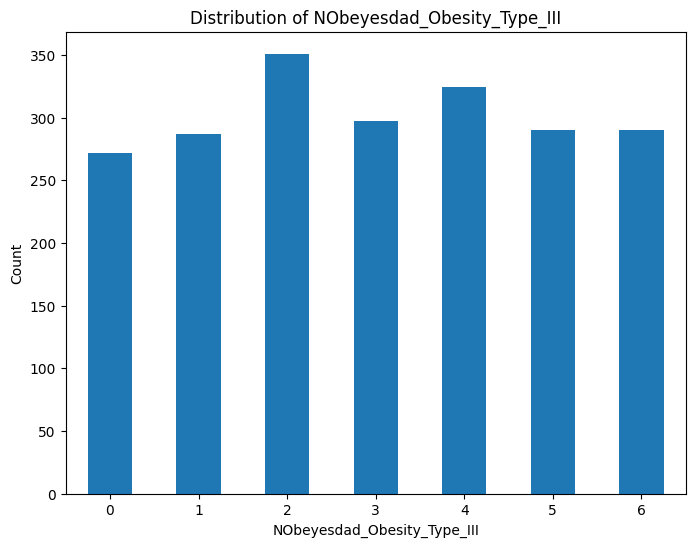

In [293]:
unique, counts = np.unique(y, return_counts=True)
distribution = pd.Series(counts, index=unique)

# Bar chart
distribution.plot(kind='bar', figsize=(8, 6))
plt.xlabel('NObeyesdad_Obesity_Type_III')
plt.ylabel('Count')
plt.title('Distribution of NObeyesdad_Obesity_Type_III')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], rotation=0)
plt.show()

### Steps 4 and 5: Two supervised learning algorithms

#### 1. K-nearest neighbors

#### Run with the default parameters, training on the training set and testing on the test set

In [294]:
# Training on training set and testing on testing set

from sklearn.neighbors import KNeighborsClassifier
k = 3

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

print("Test set accuracy: {:.4f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.8960


#### Calculate precision, recall and F1

In [295]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn.predict(X_test),
                            target_names=["class 0",
                                          "class 1",
                                          "class 2",
                                          "class 3",
                                          "class 4",
                                          "class 5",
                                          "class 6",
                                          ]))

              precision    recall  f1-score   support

     class 0       0.87      0.96      0.91        54
     class 1       0.90      0.60      0.72        58
     class 2       0.96      0.93      0.94        70
     class 3       0.93      0.95      0.94        60
     class 4       0.98      1.00      0.99        65
     class 5       0.78      0.93      0.85        58
     class 6       0.85      0.88      0.86        58

    accuracy                           0.90       423
   macro avg       0.90      0.89      0.89       423
weighted avg       0.90      0.90      0.89       423



#### Run with the default parameters using cross-validation on the whole dataset



In [296]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=4)

#5-fold cross validation
cv_scores_all = cross_val_score(knn_cv, X, y, cv=5)

print("cv_scores:\n{}".format(cv_scores_all))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_all)))

cv_scores:
[0.8392435  0.89336493 0.88862559 0.88862559 0.91232227]
cv_scores mean:
0.8844363774887117


#### Adjust 2-3 parameters using grid search. Report evaluation metrics for the best and worst-performing parameter settings.

Here we iterate through k values of 1 through 24, building and testing a k-nearest neighbors model for each value.

In [297]:
from sklearn.model_selection import GridSearchCV

#dictionary of all values of k
param_grid_knn = {"n_neighbors": np.arange(1, 25)}

#grid search on all values of k in dictionary
knn_gscv = GridSearchCV(knn, param_grid_knn, cv=5)
knn_gscv.fit(X_test, y_test)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [298]:
#best performing k (on training set)
knn_gscv.best_params_

{'n_neighbors': 1}

The best-performing k value appears to be 1.

In [299]:
#Accuracy of best performing k
knn_gscv.best_score_

0.8084873949579832

In [300]:
#Cross validation results
knn_gscv.cv_results_

{'mean_fit_time': array([0.01431675, 0.01194963, 0.01057363, 0.01081467, 0.01431036,
        0.00936809, 0.01249871, 0.00694351, 0.00554829, 0.00526366,
        0.00698891, 0.00654731, 0.01073008, 0.01057987, 0.00861068,
        0.0072597 , 0.00915937, 0.00672884, 0.00531058, 0.00782566,
        0.00740752, 0.00851107, 0.00578489, 0.00543213]),
 'std_fit_time': array([0.00507842, 0.00353669, 0.00264897, 0.00767132, 0.00517192,
        0.00353513, 0.0109995 , 0.00168246, 0.00116743, 0.00013269,
        0.00286415, 0.00340303, 0.00690918, 0.00655795, 0.00347879,
        0.00322858, 0.00242668, 0.00339212, 0.00045794, 0.00319186,
        0.00251232, 0.00357005, 0.00142236, 0.0008102 ]),
 'mean_score_time': array([0.0421092 , 0.03165398, 0.02743731, 0.02453156, 0.03075681,
        0.02951779, 0.0213623 , 0.02339616, 0.01946158, 0.01382403,
        0.02398849, 0.01949501, 0.01604218, 0.02310324, 0.02148228,
        0.01722121, 0.01500268, 0.01314497, 0.01386843, 0.01478896,
        0.018283

#### Let's visualize these results

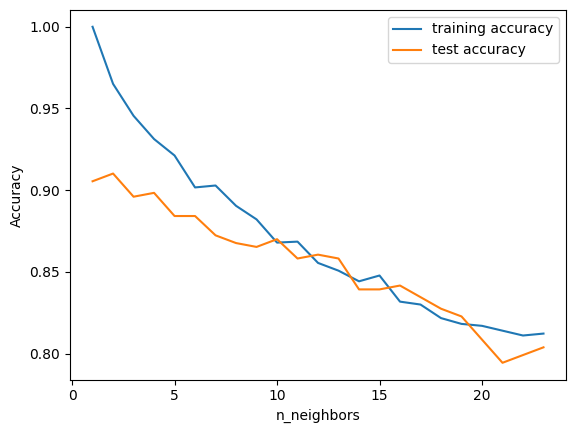

In [301]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 24)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

#### Best performing

In [302]:
# accuracy of k = 1 on testing data
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
print("knn score: {}".format(knn1.score(X_test, y_test)))

knn score: 0.9054373522458629


#### Worst performing

In [303]:
# accuracy of k = 24 on testing data
knn24 = KNeighborsClassifier(n_neighbors=24)
knn24.fit(X_train, y_train)
print("knn score: {}".format(knn24.score(X_test, y_test)))


knn score: 0.7943262411347518


#### Let's also test

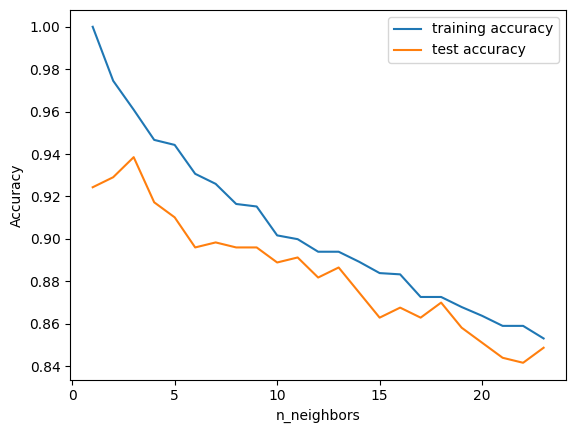

In [304]:
# test with cross validation on test set (common for small datasets)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 24)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,metric='manhattan')
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Visually, this looks like better performance than the default Euclidian Distance, so let's run grid search again adding "manhattan" to the parameters to confirm.

In [305]:
#dictionary of all values of k
param_grid_knn_manhattan = {"n_neighbors": np.arange(1, 25), 'metric':['manhattan']}

#grid search on all values of k in dictionary
knn_gscv_manhattan = GridSearchCV(knn, param_grid_knn_manhattan, cv=5)
knn_gscv_manhattan.fit(X_test, y_test)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=23),
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [306]:
#best performing k (on training set)
knn_gscv_manhattan.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [307]:
# accuracy of k = 1 with manhattan distance on testing data
knn1_manhattan = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn1_manhattan.fit(X_train, y_train)
print("knn score: {}".format(knn1_manhattan.score(X_test, y_test)))

knn score: 0.9243498817966903


A KNN model with K=1 and using the Manhattan distance parameter gives an accuracy of 92.4% on the test data, better than the K=1 model using Euclidian distance (90.5%)

#### 2. Random forest

#### Run with the default parameters, training on the training set and testing on the: testing set

In [308]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.992
Accuracy on test set: 0.887


The random forest gives us an accuracy of 88.7% on the test set, which is not as good as the best-performing KNN model (92.4%).



#### Calculate precision, recall and F1

In [309]:
print(classification_report(y_test, forest.predict(X_test),
                            target_names=["class 0",
                                          "class 1",
                                          "class 2",
                                          "class 3",
                                          "class 4",
                                          "class 5",
                                          "class 6",
                                          ]))

              precision    recall  f1-score   support

     class 0       0.89      0.91      0.90        54
     class 1       0.72      0.83      0.77        58
     class 2       0.88      0.87      0.88        70
     class 3       1.00      0.97      0.98        60
     class 4       1.00      0.98      0.99        65
     class 5       0.88      0.84      0.86        58
     class 6       0.85      0.79      0.82        58

    accuracy                           0.89       423
   macro avg       0.89      0.89      0.89       423
weighted avg       0.89      0.89      0.89       423



#### Run with the default parameters using cross-validation on the whole dataset

In [310]:
forest_cv = RandomForestClassifier(n_estimators=5, random_state=2)

#5-fold cross validation
cv_scores_forest = cross_val_score(forest_cv, X, y, cv=5)

print("cv_scores:\n{}".format(cv_scores_forest))
print("cv_scores mean:\n{}".format(np.mean(cv_scores_forest)))

cv_scores:
[0.69976359 0.93127962 0.94549763 0.92654028 0.96682464]
cv_scores mean:
0.8939811546950802


#### Plot the random forest's feature importances

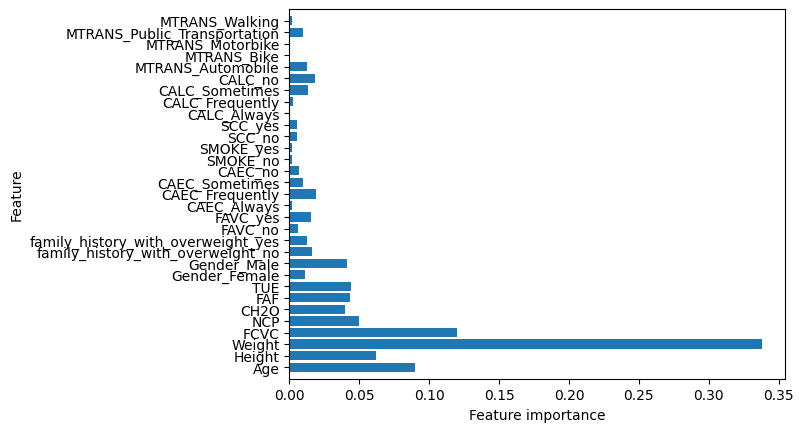

In [311]:
def plot_feature_importances(model):
    n_features = data_dummies.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data_dummies.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(forest)

#### Adjust 2-3 parameters using grid search. Report evaluation metrics for the best and worst-performing parameter settings.

In [312]:
param_grid_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
rf_gscv = GridSearchCV(estimator=forest, param_grid=param_grid_forest, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
rf_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=5, random_state=2),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [313]:
#Cross validation results
rf_gscv.cv_results_

{'mean_fit_time': array([0.51881099, 1.49682422, 1.79611826, 0.44964705, 0.88465452,
        1.36402302, 0.68425465, 1.63503733, 1.45335598, 0.48656235,
        0.95404263, 1.72626686]),
 'std_fit_time': array([0.01908163, 0.26149313, 0.51325659, 0.01638766, 0.01566946,
        0.04845029, 0.15610723, 0.24489681, 0.048657  , 0.01497705,
        0.01573954, 0.27753541]),
 'mean_score_time': array([0.02179279, 0.05520716, 0.04922299, 0.01948652, 0.03230247,
        0.0457305 , 0.03029013, 0.06104498, 0.04838161, 0.01862721,
        0.03297358, 0.05883512]),
 'std_score_time': array([0.00166915, 0.01134168, 0.00254555, 0.00324137, 0.00133151,
        0.0012424 , 0.00749128, 0.01425927, 0.00086846, 0.0003923 ,
        0.00044239, 0.01944177]),
 'param_max_depth': masked_array(data=[None, None, None, 10, 10, 10, 20, 20, 20, 30, 30, 30],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
       

#### Best-performing

In [314]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'n_estimators': 200}
Best Score: 0.9472758239249908


In [315]:
# Evaluate those parameters on the test set
best_rf = grid_search.best_estimator_
test_score = best_rf.score(X_test, y_test)
print("Test Set Score:", test_score)

Test Set Score: 0.9361702127659575


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


This tuned random forest model gives us an accuracy of 93.6% on the test set, which is better than the best-performing KNN model of k=1 with the Manhattan distance parameter (92.4%).

#### Worst-performing

In [316]:
# The worst score was 0.93188243, which we got from these params: {'max_depth': 10, 'n_estimators': 200},

forest_worst = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=2)

forest_worst.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest_worst.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest_worst.score(X_test, y_test)))


Accuracy on training set: 0.999
Accuracy on test set: 0.931


The worst-performing set of parameters in our random forest grid seach is still pretty good at 93.1% accuracy on the test set.